In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh

In [2]:
!ls ../covid19-opendata-vaccini/


AUTHORS.md    coccarda.png  LICENSE.md	Untitled.ipynb
Changelog.md  dati	    README.md


In [3]:
folder = '../covid19-opendata-vaccini/'

In [4]:
!cat dati/last-update-dataset.json

cat: dati/last-update-dataset.json: No such file or directory


In [5]:
df_anagrafica = pd.read_csv(folder +'dati/anagrafica-vaccini-summary-latest.csv')  # si aggiorna
df_consegne = pd.read_csv(folder +'dati/consegne-vaccini-latest.csv') # si aggiorna
df_platea = pd.read_csv(folder +'dati/platea.csv')
df_platea_booster = pd.read_csv(folder +'dati/platea-dose-addizionale-booster.csv')
df_punti_som_latest = pd.read_csv(folder +'dati/punti-somministrazione-latest.csv')
df_punti_som_tipologia = pd.read_csv(folder +'dati/punti-somministrazione-tipologia.csv')
df_guariti = pd.read_csv(folder +'dati/soggetti-guariti.csv')  # si aggiorna
df_somministrazione = pd.read_csv(folder +'dati/somministrazioni-vaccini-latest.csv')  # si aggiorna
df_somministrazione_summary = pd.read_csv(folder +'dati/somministrazioni-vaccini-summary-latest.csv')  # si aggiorna
df_vaccini = pd.read_csv(folder +'dati/vaccini-summary-latest.csv')   # si aggiorna

## Anagrafica df_anagrafica

In [6]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,300692,155773,144919,300393,0,299,0,2021-12-31
1,12-19,7123361,3657965,3465396,3607764,3235827,116241,163529,2021-12-31
2,20-29,11361910,5885750,5476160,5273247,4890430,207022,991211,2021-12-31
3,30-39,12405477,6302842,6102635,5661357,5247103,209291,1287726,2021-12-31
4,40-49,16601607,8192854,8408753,7219664,6745129,286099,2350715,2021-12-31
5,50-59,19963835,9767403,10196432,8227186,7607704,339370,3789575,2021-12-31
6,60-69,16771912,8161904,8610008,6662369,6083108,231765,3794670,2021-12-31
7,70-79,14468157,6843354,7624803,5465604,5221938,158180,3622435,2021-12-31
8,80-89,9717782,4042732,5675050,3481366,3412616,76429,2747371,2021-12-31
9,90+,2151664,639769,1511895,803986,775068,19803,552807,2021-12-31


In [7]:
df_anagrafica['ultimo_aggiornamento'].unique()

array(['2021-12-31'], dtype=object)

In [8]:
df_anagrafica.shape


(10, 9)

## Consegne df_consegne

In [9]:
df_consegne

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5993,VEN,Moderna,3,2021-12-21,ITH,ITH3,5,Veneto
5994,VEN,Moderna,63100,2021-12-22,ITH,ITH3,5,Veneto
5995,VEN,Pfizer/BioNTech,121680,2021-12-22,ITH,ITH3,5,Veneto
5996,VEN,Moderna,2,2021-12-28,ITH,ITH3,5,Veneto


## Platea df_platea

In [10]:
df_platea

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


## Platea booster df_platea_booster

In [11]:
df_platea_booster

,area,nome_area,categoria_prevalente,totale_popolazione
0,ABR,Abruzzo,12-19,17099
1,ABR,Abruzzo,20-29,48958
2,ABR,Abruzzo,30-39,56429
3,ABR,Abruzzo,40-49,95005
4,ABR,Abruzzo,50-59,127410
...,...,...,...,...
163,VEN,Veneto,40-49,379810
164,VEN,Veneto,50-59,542674
165,VEN,Veneto,60-69,475409
166,VEN,Veneto,70-79,428943


## Punti somministrazione latest df_punti_som_latest

In [12]:
df_punti_som_latest

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


## Punti somministrazione tipologia df_punti_som_tipologia

In [13]:
df_punti_som_tipologia

,area,denominazione_struttura,tipologia,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,ANESIS S.R.L.,RIA,ITF,ITF1,13,Abruzzo
1,ABR,ASS. FOCOLARE MARIA REGINA ONU,RIA,ITF,ITF1,13,Abruzzo
2,ABR,CDC S.CAMILLA-C.RIA.VILLA PINI,RIA,ITF,ITF1,13,Abruzzo
3,ABR,CENTO RIABILITAZIONE S.AGNESE,RIA,ITF,ITF1,13,Abruzzo
4,ABR,CENTRO EX ART 26 PIZZOLI,RIA,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...
2448,VEN,OSPEDALE MILITARE (PUNTO VACCINAZIONI),STS,ITH,ITH3,5,Veneto
2449,VEN,PALAZZETTO DELLO SPORT 'BORGO ROSSI' (PUNTO VA...,STS,ITH,ITH3,5,Veneto
2450,VEN,PALAZZETTO DELLO SPORT DI CITTADELLA,STS,ITH,ITH3,5,Veneto
2451,VEN,PALAZZETTO DELLO SPORT DI LOREGGIA,STS,ITH,ITH3,5,Veneto


## Guariti df_guariti

In [14]:
df_guariti

,area,nome_area,fascia_anagrafica,totale_guariti
0,ABR,Abruzzo,05-11,1642
1,ABR,Abruzzo,12-19,1353
2,ABR,Abruzzo,20-29,899
3,ABR,Abruzzo,30-39,964
4,ABR,Abruzzo,40-49,1073
...,...,...,...,...
184,VEN,Veneto,40-49,10479
185,VEN,Veneto,50-59,9039
186,VEN,Veneto,60-69,3644
187,VEN,Veneto,70-79,1412


## Somministrazione df_somministrazione

In [15]:
df_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168261,2021-12-30,Pfizer/BioNTech,VEN,60-69,915,1084,73,121,4,1801,ITH,ITH3,5,Veneto
168262,2021-12-30,Pfizer/BioNTech,VEN,70-79,644,908,42,65,1,1444,ITH,ITH3,5,Veneto
168263,2021-12-30,Pfizer/BioNTech,VEN,80-89,237,445,28,21,0,633,ITH,ITH3,5,Veneto
168264,2021-12-30,Pfizer/BioNTech,VEN,90+,59,159,4,12,0,202,ITH,ITH3,5,Veneto


In [16]:
np.sort(df_somministrazione['data_somministrazione'].unique())

array(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
       '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
       '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
       '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
       '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-

In [17]:
df_subset_summary = df_somministrazione[df_somministrazione['data_somministrazione'] == '2021-12-15']
df_subset_summary.shape


(400, 14)

In [18]:
df_subset_summary

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
161982,2021-12-15,Janssen,EMR,30-39,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161983,2021-12-15,Janssen,EMR,40-49,1,1,2,0,0,0,ITH,ITH5,8,Emilia-Romagna
161984,2021-12-15,Janssen,EMR,50-59,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161985,2021-12-15,Janssen,EMR,70-79,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
161986,2021-12-15,Janssen,FVG,60-69,1,0,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162377,2021-12-15,Pfizer/BioNTech,VEN,50-59,2131,2441,201,159,2,4210,ITH,ITH3,5,Veneto
162378,2021-12-15,Pfizer/BioNTech,VEN,60-69,1993,2367,103,103,2,4152,ITH,ITH3,5,Veneto
162379,2021-12-15,Pfizer/BioNTech,VEN,70-79,2419,2834,78,72,0,5103,ITH,ITH3,5,Veneto
162380,2021-12-15,Pfizer/BioNTech,VEN,80-89,936,1589,31,43,0,2451,ITH,ITH3,5,Veneto


In [19]:
df_somministrazione['fornitore'].unique()

array(['Moderna', 'Pfizer/BioNTech', 'Janssen', 'Vaxzevria (AstraZeneca)',
       'Pfizer Pediatrico'], dtype=object)

## Somministrazione sumary df_somministrazione_summary

In [20]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11033,5670,5363,1428,4226,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,2021-06-05,CAL,20820,9722,11098,17638,3097,85,0,ITF,ITF6,18,Calabria
7649,2021-08-30,EMR,27099,14236,12863,7635,18403,1061,0,ITH,ITH5,8,Emilia-Romagna
7650,2021-01-31,LIG,629,272,357,3,626,0,0,ITC,ITC3,7,Liguria
7651,2021-06-23,MAR,13896,6820,7076,6601,7013,282,0,ITI,ITI3,11,Marche


In [21]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
       '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
       '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
       '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
       '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-

In [22]:
df_subset = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']
df_subset.shape

(21, 13)

In [23]:
df_subset

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
145,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
174,2021-12-15,PUG,47214,22244,24970,2078,1769,39,43328,ITF,ITF4,16,Puglia
404,2021-12-15,MAR,14748,6724,8024,812,446,20,13470,ITI,ITI3,11,Marche
999,2021-12-15,MOL,3096,1469,1627,134,73,0,2889,ITF,ITF2,14,Molise
2375,2021-12-15,BAS,4173,1922,2251,190,133,9,3841,ITF,ITF5,17,Basilicata
3431,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
3810,2021-12-15,LAZ,59894,28588,31306,3460,2008,80,54346,ITI,ITI4,12,Lazio
4934,2021-12-15,UMB,7738,3614,4124,333,300,7,7098,ITI,ITI2,10,Umbria
5200,2021-12-15,SAR,15725,7594,8131,632,474,30,14589,ITG,ITG2,20,Sardegna
5411,2021-12-15,FVG,11549,5597,5952,422,648,2,10477,ITH,ITH4,6,Friuli-Venezia Giulia


In [24]:
df_subset.sort_values('codice_regione_ISTAT')

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
6415,2021-12-15,PIE,33706,15610,18096,2098,1516,19,30073,ITC,ITC1,1,Piemonte
3431,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
6532,2021-12-15,LOM,102426,47933,54493,3480,2012,100,96834,ITC,ITC4,3,Lombardia
145,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
6528,2021-12-15,PAT,3308,1437,1871,236,202,3,2867,ITH,ITH2,4,Provincia Autonoma Trento
7616,2021-12-15,VEN,55038,25673,29365,2661,1818,88,50471,ITH,ITH3,5,Veneto
5411,2021-12-15,FVG,11549,5597,5952,422,648,2,10477,ITH,ITH4,6,Friuli-Venezia Giulia
6608,2021-12-15,LIG,16279,7443,8836,1057,942,3,14277,ITC,ITC3,7,Liguria
6103,2021-12-15,EMR,39618,18023,21595,1722,856,61,36979,ITH,ITH5,8,Emilia-Romagna
7544,2021-12-15,TOS,37522,17121,20401,2190,1586,87,33659,ITI,ITI1,9,Toscana


In [25]:
np.sort(df_somministrazione_summary['codice_regione_ISTAT'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [26]:
set_somm = set(df_somministrazione.columns)

In [27]:
set_somm_summary = set(df_somministrazione_summary.columns)

In [28]:
set_somm - set_somm_summary

{'fascia_anagrafica', 'fornitore'}

In [29]:
set_somm_summary - set_somm

{'totale'}

## Vaccini df_vaccini

In [30]:
df_vaccini

,area,dosi_somministrate,dosi_consegnate,percentuale_somministrazione,ultimo_aggiornamento,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,2400991,2575423,93.2,2021-12-31,ITF,ITF1,13,Abruzzo
1,BAS,1016669,1070195,95.0,2021-12-31,ITF,ITF5,17,Basilicata
2,CAL,3228422,3345499,96.5,2021-12-31,ITF,ITF6,18,Calabria
3,CAM,10111970,10431868,96.9,2021-12-31,ITF,ITF3,15,Campania
4,EMR,8428433,8474373,99.5,2021-12-31,ITH,ITH5,8,Emilia-Romagna
5,FVG,2173431,2295973,94.7,2021-12-31,ITH,ITH4,6,Friuli-Venezia Giulia
6,LAZ,10949634,11817777,92.7,2021-12-31,ITI,ITI4,12,Lazio
7,LIG,2835309,2857067,99.2,2021-12-31,ITC,ITC3,7,Liguria
8,LOM,19478339,19749526,98.6,2021-12-31,ITC,ITC4,3,Lombardia
9,MAR,2769944,2865297,96.7,2021-12-31,ITI,ITI3,11,Marche


# Analisi

In [31]:
df_somministrazione_summary.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11033,5670,5363,1428,4226,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo


In [32]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-09-01'].groupby('data_somministrazione').sum()

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-09-01,314267,164329,149938,124259,178696,11312,0,214


In [33]:
df_plot = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] > '2021-12-01'].groupby('data_somministrazione').sum()

In [34]:
df_plot

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-12-02,493290,228417,264873,33067,21184,739,438300,214
2021-12-03,522832,238266,284566,34635,22391,700,465106,214
2021-12-04,469799,212950,256849,32208,19707,615,417269,214
2021-12-05,293836,137797,156039,22979,10049,428,260380,214
2021-12-06,522703,248797,273906,44162,22221,797,455523,214
2021-12-07,541776,252777,288999,42650,20601,642,477883,214
2021-12-08,280861,135024,145837,23526,7978,386,248971,214
2021-12-09,556652,261759,294893,38214,27826,728,489884,214
2021-12-10,575911,264637,311274,35984,24462,735,514730,214


## Tipi di plot

### Seaborn

In [35]:
sns.set_style("darkgrid")

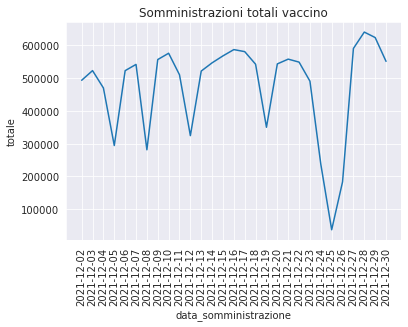

In [36]:
sns.lineplot(x="data_somministrazione", y="totale",\
             data=df_plot)
plt.xticks(rotation=90)
plt.title('Somministrazioni totali vaccino')
plt.show()

### Plot pandas

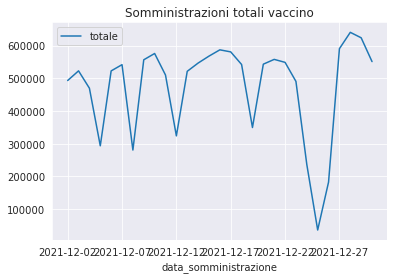

In [37]:
df_plot.plot(y="totale", title = 'Somministrazioni totali vaccino')
plt.show()

### Pandas bokeh

In [38]:
pandas_bokeh.output_notebook()

g = df_plot.plot_bokeh(y="totale", kind='line', vertical_xlabel = True)
#g.xaxis.major_label_orientation = 78



Loading BokehJS ...

In [39]:
df_somministrazione_summary.loc[:,'data_somministrazione'] = pd.to_datetime(\
                            df_somministrazione_summary['data_somministrazione'], format='%Y-%m-%d')
df_somministrazione_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7653 entries, 0 to 7652
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   data_somministrazione     7653 non-null   datetime64[ns]
 1   area                      7653 non-null   object        
 2   totale                    7653 non-null   int64         
 3   sesso_maschile            7653 non-null   int64         
 4   sesso_femminile           7653 non-null   int64         
 5   prima_dose                7653 non-null   int64         
 6   seconda_dose              7653 non-null   int64         
 7   pregressa_infezione       7653 non-null   int64         
 8   dose_addizionale_booster  7653 non-null   int64         
 9   codice_NUTS1              7653 non-null   object        
 10  codice_NUTS2              7653 non-null   object        
 11  codice_regione_ISTAT      7653 non-null   int64         
 12  nome_area           

In [40]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-01-26,MAR,2020,747,1273,77,1942,1,0,ITI,ITI3,11,Marche
1,2021-03-09,CAL,6661,3464,3197,5601,992,68,0,ITF,ITF6,18,Calabria
2,2021-05-17,VEN,26554,13003,13551,15623,10081,850,0,ITH,ITH3,5,Veneto
3,2021-11-02,PUG,11033,5670,5363,1428,4226,171,5208,ITF,ITF4,16,Puglia
4,2021-11-03,ABR,5001,2609,2392,453,1828,65,2655,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,2021-06-05,CAL,20820,9722,11098,17638,3097,85,0,ITF,ITF6,18,Calabria
7649,2021-08-30,EMR,27099,14236,12863,7635,18403,1061,0,ITH,ITH5,8,Emilia-Romagna
7650,2021-01-31,LIG,629,272,357,3,626,0,0,ITC,ITC3,7,Liguria
7651,2021-06-23,MAR,13896,6820,7076,6601,7013,282,0,ITI,ITI3,11,Marche


## Andamento vaccini totale - prima, seconda, booster

In [41]:
df_somm_grouped = df_somministrazione_summary.groupby('data_somministrazione').sum()

In [42]:
df_somm_grouped

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2020-12-27,7345,3499,3846,7330,0,15,0,214
2020-12-28,1503,687,816,1501,0,2,0,85
2020-12-29,1095,483,612,1094,0,1,0,61
2020-12-30,4864,1955,2909,4862,0,2,0,105
2020-12-31,25928,10057,15871,25894,0,34,0,152
...,...,...,...,...,...,...,...,...
2021-12-26,182887,90512,92375,16798,7454,230,158405,210
2021-12-27,590584,280543,310041,49036,41851,1090,498607,214
2021-12-28,640568,304007,336561,58557,36516,961,544534,214


In [43]:
g = df_somm_grouped.plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [44]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [45]:
g = df_somm_grouped.plot_bokeh(y = ['totale',\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left")#, logy=True)

In [46]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = ['totale',\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),
                                                 legend="top_left")#, logy=True)

In [47]:
df_somministrazione_summary.sort_values('data_somministrazione').head(20)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
3690,2020-12-27,FVG,266,151,115,266,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
298,2020-12-27,BAS,107,41,66,107,0,0,0,ITF,ITF5,17,Basilicata
6416,2020-12-27,MAR,210,100,110,209,0,1,0,ITI,ITI3,11,Marche
3042,2020-12-27,LOM,718,414,304,717,0,1,0,ITC,ITC4,3,Lombardia
4235,2020-12-27,VEN,880,395,485,879,0,1,0,ITH,ITH3,5,Veneto
6355,2020-12-27,PAB,145,66,79,145,0,0,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
5279,2020-12-27,PUG,510,252,258,510,0,0,0,ITF,ITF4,16,Puglia
6936,2020-12-27,UMB,92,51,41,92,0,0,0,ITI,ITI2,10,Umbria
1692,2020-12-27,PIE,923,370,553,921,0,2,0,ITC,ITC1,1,Piemonte
2771,2020-12-27,LAZ,277,133,144,276,0,1,0,ITI,ITI4,12,Lazio


In [48]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
145,2021-12-15,PAB,2611,1276,1335,221,285,0,2105,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
174,2021-12-15,PUG,47214,22244,24970,2078,1769,39,43328,ITF,ITF4,16,Puglia
404,2021-12-15,MAR,14748,6724,8024,812,446,20,13470,ITI,ITI3,11,Marche
999,2021-12-15,MOL,3096,1469,1627,134,73,0,2889,ITF,ITF2,14,Molise
2375,2021-12-15,BAS,4173,1922,2251,190,133,9,3841,ITF,ITF5,17,Basilicata
3431,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
3810,2021-12-15,LAZ,59894,28588,31306,3460,2008,80,54346,ITI,ITI4,12,Lazio
4934,2021-12-15,UMB,7738,3614,4124,333,300,7,7098,ITI,ITI2,10,Umbria
5200,2021-12-15,SAR,15725,7594,8131,632,474,30,14589,ITG,ITG2,20,Sardegna
5411,2021-12-15,FVG,11549,5597,5952,422,648,2,10477,ITH,ITH4,6,Friuli-Venezia Giulia


In [49]:
df_check = df_somm_grouped.copy()

In [50]:
df_check.loc[:, 'check_totale'] = df_check['prima_dose'] + df_check['seconda_dose'] + df_check['dose_addizionale_booster'] + df_check['pregressa_infezione']

In [51]:
df_check

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT,check_totale
data_somministrazione,,,,,,,,,
2020-12-27,7345,3499,3846,7330,0,15,0,214,7345
2020-12-28,1503,687,816,1501,0,2,0,85,1503
2020-12-29,1095,483,612,1094,0,1,0,61,1095
2020-12-30,4864,1955,2909,4862,0,2,0,105,4864
2020-12-31,25928,10057,15871,25894,0,34,0,152,25928
...,...,...,...,...,...,...,...,...,...
2021-12-26,182887,90512,92375,16798,7454,230,158405,210,182887
2021-12-27,590584,280543,310041,49036,41851,1090,498607,214,590584
2021-12-28,640568,304007,336561,58557,36516,961,544534,214,640568


## Vaccini per fasce anagrafiche

In [52]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
168261,2021-12-30,Pfizer/BioNTech,VEN,60-69,915,1084,73,121,4,1801,ITH,ITH3,5,Veneto
168262,2021-12-30,Pfizer/BioNTech,VEN,70-79,644,908,42,65,1,1444,ITH,ITH3,5,Veneto
168263,2021-12-30,Pfizer/BioNTech,VEN,80-89,237,445,28,21,0,633,ITH,ITH3,5,Veneto
168264,2021-12-30,Pfizer/BioNTech,VEN,90+,59,159,4,12,0,202,ITH,ITH3,5,Veneto
168265,2021-12-30,Vaxzevria (AstraZeneca),SIC,70-79,1,1,0,2,0,0,ITG,ITG1,19,Sicilia


In [53]:
df_somministrazione.loc[:, 'data_somministrazione'] = pd.to_datetime(df_somministrazione['data_somministrazione'], format='%Y-%m-%d')

In [54]:
df_somministrazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168266 entries, 0 to 168265
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   data_somministrazione     168266 non-null  datetime64[ns]
 1   fornitore                 168266 non-null  object        
 2   area                      168266 non-null  object        
 3   fascia_anagrafica         168266 non-null  object        
 4   sesso_maschile            168266 non-null  int64         
 5   sesso_femminile           168266 non-null  int64         
 6   prima_dose                168266 non-null  int64         
 7   seconda_dose              168266 non-null  int64         
 8   pregressa_infezione       168266 non-null  int64         
 9   dose_addizionale_booster  168266 non-null  int64         
 10  codice_NUTS1              168266 non-null  object        
 11  codice_NUTS2              168266 non-null  object        
 12  co

In [55]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
168261,2021-12-30,Pfizer/BioNTech,VEN,60-69,915,1084,73,121,4,1801,ITH,ITH3,5,Veneto
168262,2021-12-30,Pfizer/BioNTech,VEN,70-79,644,908,42,65,1,1444,ITH,ITH3,5,Veneto
168263,2021-12-30,Pfizer/BioNTech,VEN,80-89,237,445,28,21,0,633,ITH,ITH3,5,Veneto
168264,2021-12-30,Pfizer/BioNTech,VEN,90+,59,159,4,12,0,202,ITH,ITH3,5,Veneto
168265,2021-12-30,Vaxzevria (AstraZeneca),SIC,70-79,1,1,0,2,0,0,ITG,ITG1,19,Sicilia


In [56]:
df_pivot = pd.pivot_table(df_somministrazione, index = ['data_somministrazione', 'fascia_anagrafica'], aggfunc=np.sum)

In [57]:
df_pivot

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2020-12-27            20-29                               214   
                      30-39                               214   
                      40-49                               214   
                      50-59                               214   
                      60-69                               214   
...                                                       ...   
2021-12-30            50-59                               445   
                      60-69                               445   
                      70-79                               463   
                      80-89                               426   
                      90+                                 426   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2020-12-27            20-29                                     0   
                      30-39                                     0   
                      40-49                                     0   
                      50-59                                     0   
                      60-69                                     0   
...                                                           ...   
2021-12-30            50-59                                107494   
                      60-69                                 91489   
                      70-79                                 75598   
                      80-89                                 18405   
                      90+                                    3578   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2020-12-27            20-29                                0         704   
                      30-39                                0        1088   
                      40-49                                2        1506   
                      50-59                                3        2204   
                      60-69                                5        1507   
...                                                      ...         ...   
2021-12-30            50-59                               51        3176   
                      60-69                               32        2101   
                      70-79                               10        1257   
                      80-89                                1         561   
                      90+                                  1         162   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2020-12-27            20-29                         0              446   
                      30-39                         0              598   
                      40-49                         0              939   
                      50-59                         0             1255   
                      60-69                         0              411   
...                                               ...              ...   
2021-12-30            50-59                      4784            56682   
                      60-69                      3172            50271   
                      70-79                      1671            42935   
                      80-89                       576            12196   
                      90+                         162             2768   

                                         sesso_maschile  
data_somministrazione fascia_anagrafica                  
2020-12-27            20-29                         258  
                      30-39                         490  
                      40-49                         569  
                      50-59                         952

In [58]:
df_pivot.loc[:, 'totale_vaccini'] = df_pivot['prima_dose'] + df_pivot['seconda_dose'] + df_pivot['dose_addizionale_booster']

In [59]:
df_pivot.loc['2021-12-01', :]

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2021-12-01            12-19                               438   
                      20-29                               441   
                      30-39                               450   
                      40-49                               445   
                      50-59                               445   
                      60-69                               453   
                      70-79                               454   
                      80-89                               428   
                      90+                                 428   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2021-12-01            12-19                                  1350   
                      20-29                                 16965   
                      30-39                                 23369   
                      40-49                                 52730   
                      50-59                                 94389   
                      60-69                                 84906   
                      70-79                                 85991   
                      80-89                                 42606   
                      90+                                    9035   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2021-12-01            12-19                              145        8860   
                      20-29                              171        4118   
                      30-39                              127        5109   
                      40-49                               97        4898   
                      50-59                               75        4170   
                      60-69                               34        2563   
                      70-79                               11        1421   
                      80-89                                4         603   
                      90+                                  0         178   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2021-12-01            12-19                      3123             6298   
                      20-29                      2940            13528   
                      30-39                      3531            17618   
                      40-49                      3165            32763   
                      50-59                      2885            53740   
                      60-69                      1872            46490   
                      70-79                      1091            45608   
                      80-89                       506            26320   
                      90+                         139             6771   

                                         sesso_maschile  totale_vaccini  
data_somministrazione fascia_anagrafica                                  
2021-12-01            12-19                        7180           13333  
                      20-29                       10666           24023  
                      30-39                       14518           32009  
                      40-49                       28127           60793  
                      50-59                       47779          101444  
                      60-69                       42885           89341  
                      70-79                       42906           88503  
                      80-89                       17399           43715  
                      90+                          2581            9352

In [60]:
df_1 = df_pivot.reset_index('fascia_anagrafica')

In [61]:
df_pivot_2 = df_1.pivot(columns = 'fascia_anagrafica', values = 'totale_vaccini')

In [62]:
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1506.0,2204.0,1507.0,128.0,117.0,76.0
2020-12-28,NaN,NaN,173.0,278.0,368.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,210.0,239.0,330.0,201.0,8.0,9.0,9.0
2020-12-30,NaN,3.0,493.0,886.0,1245.0,1294.0,589.0,95.0,160.0,97.0
2020-12-31,NaN,23.0,2450.0,4368.0,5827.0,7211.0,3600.0,581.0,1041.0,793.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-26,11864.0,8279.0,20325.0,19681.0,32486.0,41269.0,26303.0,18139.0,3740.0,571.0
2021-12-27,27018.0,34103.0,67715.0,64278.0,92696.0,119770.0,95618.0,70175.0,15192.0,2929.0
2021-12-28,35156.0,33851.0,63086.0,64485.0,97235.0,126483.0,108508.0,86180.0,20463.0,4160.0


<AxesSubplot:xlabel='data_somministrazione'>

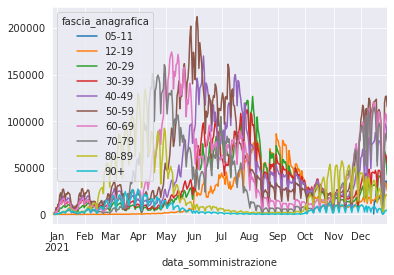

In [63]:
df_pivot_2.plot()

In [64]:
g = df_pivot_2.resample(rule='W').mean().plot_bokeh(vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), legend="top_left")

In [65]:
g = df_pivot_2.fillna(0).resample(rule='W').mean()\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

In [66]:
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1506.0,2204.0,1507.0,128.0,117.0,76.0
2020-12-28,NaN,NaN,173.0,278.0,368.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,210.0,239.0,330.0,201.0,8.0,9.0,9.0
2020-12-30,NaN,3.0,493.0,886.0,1245.0,1294.0,589.0,95.0,160.0,97.0
2020-12-31,NaN,23.0,2450.0,4368.0,5827.0,7211.0,3600.0,581.0,1041.0,793.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-26,11864.0,8279.0,20325.0,19681.0,32486.0,41269.0,26303.0,18139.0,3740.0,571.0
2021-12-27,27018.0,34103.0,67715.0,64278.0,92696.0,119770.0,95618.0,70175.0,15192.0,2929.0
2021-12-28,35156.0,33851.0,63086.0,64485.0,97235.0,126483.0,108508.0,86180.0,20463.0,4160.0


## Percentuale vaccinati per fasce anagrafiche

In [67]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,300692,155773,144919,300393,0,299,0,2021-12-31
1,12-19,7123361,3657965,3465396,3607764,3235827,116241,163529,2021-12-31
2,20-29,11361910,5885750,5476160,5273247,4890430,207022,991211,2021-12-31
3,30-39,12405477,6302842,6102635,5661357,5247103,209291,1287726,2021-12-31
4,40-49,16601607,8192854,8408753,7219664,6745129,286099,2350715,2021-12-31
5,50-59,19963835,9767403,10196432,8227186,7607704,339370,3789575,2021-12-31
6,60-69,16771912,8161904,8610008,6662369,6083108,231765,3794670,2021-12-31
7,70-79,14468157,6843354,7624803,5465604,5221938,158180,3622435,2021-12-31
8,80-89,9717782,4042732,5675050,3481366,3412616,76429,2747371,2021-12-31
9,90+,2151664,639769,1511895,803986,775068,19803,552807,2021-12-31


In [181]:
df_platea.head(30)

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
5,ABR,Abruzzo,50-59,208686
6,ABR,Abruzzo,60-69,171793
7,ABR,Abruzzo,70-79,137406
8,ABR,Abruzzo,80+,116953
9,BAS,Basilicata,05-11,28955


In [73]:
df_platea_grouped = df_platea.groupby('fascia_anagrafica').sum()
df_platea_grouped


,totale_popolazione
fascia_anagrafica,
05-11,3656069
12-19,4627514
20-29,6014643
30-39,6794108
40-49,8782667
50-59,9648935
60-69,7553311
70-79,6018697
80+,4570070


In [164]:
df_somma_righe = df_anagrafica.copy().set_index('fascia_anagrafica')

In [165]:
eighty= df_somma_righe.loc[['80-89', '90+'],:].sum(axis = 0 ).to_frame().transpose()

In [166]:
eighty_1 = eighty.reset_index()
eighty_1.iloc[0,0] = '80+'
eighty_1.loc[0, 'ultimo_aggiornamento'] = eighty_1.loc[0, 'ultimo_aggiornamento'][:int(len(eighty_1.loc[0, 'ultimo_aggiornamento'])/2)]
eighty_1.set_index('index', inplace = True)
eighty_1

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
index,,,,,,,,
80+,11869446,4682501,7186945,4285352,4187684,96232,3300178,2021-12-31


In [169]:
df_anag_new = pd.concat([df_somma_righe.drop(['80-89', '90+']), eighty_1])
df_anag_new

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
05-11,300692,155773,144919,300393,0,299,0,2021-12-31
12-19,7123361,3657965,3465396,3607764,3235827,116241,163529,2021-12-31
20-29,11361910,5885750,5476160,5273247,4890430,207022,991211,2021-12-31
30-39,12405477,6302842,6102635,5661357,5247103,209291,1287726,2021-12-31
40-49,16601607,8192854,8408753,7219664,6745129,286099,2350715,2021-12-31
50-59,19963835,9767403,10196432,8227186,7607704,339370,3789575,2021-12-31
60-69,16771912,8161904,8610008,6662369,6083108,231765,3794670,2021-12-31
70-79,14468157,6843354,7624803,5465604,5221938,158180,3622435,2021-12-31
80+,11869446,4682501,7186945,4285352,4187684,96232,3300178,2021-12-31


In [171]:
df_platea_grouped

,totale_popolazione
fascia_anagrafica,
05-11,3656069
12-19,4627514
20-29,6014643
30-39,6794108
40-49,8782667
50-59,9648935
60-69,7553311
70-79,6018697
80+,4570070


In [174]:
df_fasce = pd.concat([df_anag_new, df_platea_grouped], axis = 1)
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione
05-11,300692,155773,144919,300393,0,299,0,2021-12-31,3656069
12-19,7123361,3657965,3465396,3607764,3235827,116241,163529,2021-12-31,4627514
20-29,11361910,5885750,5476160,5273247,4890430,207022,991211,2021-12-31,6014643
30-39,12405477,6302842,6102635,5661357,5247103,209291,1287726,2021-12-31,6794108
40-49,16601607,8192854,8408753,7219664,6745129,286099,2350715,2021-12-31,8782667
50-59,19963835,9767403,10196432,8227186,7607704,339370,3789575,2021-12-31,9648935
60-69,16771912,8161904,8610008,6662369,6083108,231765,3794670,2021-12-31,7553311
70-79,14468157,6843354,7624803,5465604,5221938,158180,3622435,2021-12-31,6018697
80+,11869446,4682501,7186945,4285352,4187684,96232,3300178,2021-12-31,4570070


In [182]:
df_fasce.loc[:, 'percentuale_prima'] = df_fasce['prima_dose'] / df_fasce['totale_popolazione']*100
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,percentuale,percentuale_prima
05-11,300692,155773,144919,300393,0,299,0,2021-12-31,3656069,8.224462,8.216284
12-19,7123361,3657965,3465396,3607764,3235827,116241,163529,2021-12-31,4627514,153.934942,77.96333
20-29,11361910,5885750,5476160,5273247,4890430,207022,991211,2021-12-31,6014643,188.904146,87.673483
30-39,12405477,6302842,6102635,5661357,5247103,209291,1287726,2021-12-31,6794108,182.591696,83.327451
40-49,16601607,8192854,8408753,7219664,6745129,286099,2350715,2021-12-31,8782667,189.026944,82.203549
50-59,19963835,9767403,10196432,8227186,7607704,339370,3789575,2021-12-31,9648935,206.901953,85.265224
60-69,16771912,8161904,8610008,6662369,6083108,231765,3794670,2021-12-31,7553311,222.047153,88.204616
70-79,14468157,6843354,7624803,5465604,5221938,158180,3622435,2021-12-31,6018697,240.386864,90.81042
80+,11869446,4682501,7186945,4285352,4187684,96232,3300178,2021-12-31,4570070,259.721317,93.769942


<AxesSubplot:>

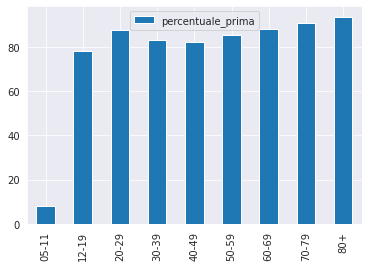

In [186]:
df_fasce.plot(kind = 'bar', y = 'percentuale_prima')


In [188]:
g = df_fasce.plot_bokeh(kind = 'bar', y = 'percentuale_prima') #, vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

Exception: No numeric data columns found for plotting.